## Exploratory Data Analysis 

Employee turnover is a key problem faced by many organizations. When good people leave, it usually costs the organization substantial time and other resources to find a replacement. Therefore, many organizations try to keep the churn rate at a low level. Imagine a company who now wants to understand its employee churn situation. Its HR (Human Resources) department gives you some data of their employees, and asks you to do exploratory data analysis and to predict employee churn.


### Summary of the data (i.e. min, max, mean and quartiles for each variable). 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

In [4]:
data = pd.read_csv('termination.csv')

In [5]:
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [7]:
data.describe(include='all',percentiles=[]) # get the summary statistics

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
count,49653.000000,49653,49653,49653,49653,49653.000000,49653.000000,49653,49653,49653,49653.000000,49653,49653,49653,49653,49653.000000,49653,49653
unique,NaN,130,5342,4415,1055,NaN,NaN,40,21,47,NaN,2,2,4,3,NaN,2,2
top,NaN,12/31/2013 0:00,1973-03-23,2005-10-16,1900-01-01,NaN,NaN,Vancouver,Meats,Meat Cutter,NaN,F,Female,Not Applicable,Not Applicable,NaN,ACTIVE,STORES
freq,NaN,5215,40,50,42450,NaN,NaN,11211,10269,9984,NaN,25898,25898,41853,41853,NaN,48168,49068
mean,4859.495740,NaN,NaN,NaN,NaN,42.077035,10.434596,NaN,NaN,NaN,27.297605,NaN,NaN,NaN,NaN,2010.612612,NaN,NaN
std,1826.571142,NaN,NaN,NaN,NaN,12.427257,6.325286,NaN,NaN,NaN,13.514134,NaN,NaN,NaN,NaN,2.845577,NaN,NaN
min,1318.000000,NaN,NaN,NaN,NaN,19.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2006.000000,NaN,NaN
50%,5031.000000,NaN,NaN,NaN,NaN,42.000000,10.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
max,8336.000000,NaN,NaN,NaN,NaN,65.000000,26.000000,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN


### The percent of terminated employees out of all employees for each year (2006-2015)

In [43]:
pivot_table = pd.pivot_table(data,index=["STATUS_YEAR"],columns=['STATUS']) 
# Create a pivot_table indexing STATUS_YEAR and apply to STATUS column
pivot_table

EmployeeID                     age            length_of_service  \
STATUS            ACTIVE   TERMINATED     ACTIVE TERMINATED            ACTIVE   
STATUS_YEAR                                                                     
2006         4215.734983  3575.582090  43.259843  60.000000          8.213048   
2007         4363.957753  3779.302469  42.700509  59.185185          8.675735   
2008         4509.896372  4211.597561  42.107973  58.420732          9.130567   
2009         4701.415074  2968.345070  41.543737  59.253521          9.442887   
2010         4875.620455  3587.333333  41.135124  55.528455          9.806818   
2011         4998.065165  5639.454545  41.090507  43.063636         10.341512   
2012         5128.366595  5844.100000  40.924525  44.146154         10.837091   
2013         5242.863279  5906.257143  40.855609  47.952381         11.386194   
2014         5237.691657  5339.260870  41.926441  40.438735         12.428255   
2015         5282.794957  3890.555556  42.664930  50.746914         13.291936   

                       store_name             
STATUS      TERMINATED     ACTIVE TERMINATED  
STATUS_YEAR                                   
2006          9.888060  27.137683  25.746269  
2007         10.271605  27.196638  25.858025  
2008          9.951220  27.291332  26.054878  
2009         14.528169  27.267728  26.950704  
2010         13.536585  27.288636  25.260163  
2011          7.618182  27.383749  24.536364  
2012          8.115385  27.365419  26.669231  
2013          9.009524  27.311601  27.238095  
2014         11.403162  27.657396  20.529644  
2015         17.302469  27.559700  30.623457

In [50]:
# Based on the pivot_table, find total number of employees each year
number_of_active = data.pivot_table(index=["STATUS_YEAR"],columns=['STATUS'], aggfunc=lambda x: len(x.unique()))['EmployeeID']['ACTIVE']
number_of_terminatd = data.pivot_table(index=["STATUS_YEAR"],columns=['STATUS'], aggfunc=lambda x: len(x.unique()))['EmployeeID']['TERMINATED']
total_number_each_year = number_of_active + number_of_terminatd
total_number_each_year

STATUS_YEAR
2006    4579
2007    4683
2008    4767
2009    4852
2010    4963
2011    5082
2012    5231
2013    5320
2014    5215
2015    4961
dtype: int64

In [48]:
# compute the percentage

In [52]:
terminatd_percentage_each_year = number_of_terminatd/number_of_active
terminatd_percentage_each_year

STATUS_YEAR
2006    0.030146
2007    0.035833
2008    0.035629
2009    0.030149
2010    0.025413
2011    0.022124
2012    0.025485
2013    0.020134
2014    0.050988
2015    0.033757
dtype: float64

### Average termination rate over the 10 years

In [54]:
terminatd_percentage_each_year.mean()

0.030965765155401604

### Different types of termination. 

In [ ]:
# Filter dataframe for the relevant status for this question

In [73]:
features = ['STATUS_YEAR', 'STATUS','termreason_desc']
data2 = data[features]
flitered_data = data2[data2['STATUS']=='TERMINATED']

In [53]:
# Create pivot table on column termreason_desc

In [104]:
pivot_table= flitered_data.pivot_table(index=["STATUS_YEAR"],columns=['termreason_desc'], aggfunc = lambda x: len(x))
pivot_table.fillna(value=0,inplace=True)
pivot_table

STATUS                      
termreason_desc Layoff Resignaton Retirement
STATUS_YEAR                                 
2006               0.0       12.0      122.0
2007               0.0       25.0      137.0
2008               0.0       26.0      138.0
2009               0.0       18.0      124.0
2010               0.0       29.0       94.0
2011               0.0       69.0       41.0
2012               0.0       76.0       54.0
2013               0.0       49.0       56.0
2014             142.0       55.0       56.0
2015              73.0       26.0       63.0

In [114]:
# Plot stacked bar chart using pandas plot bar function

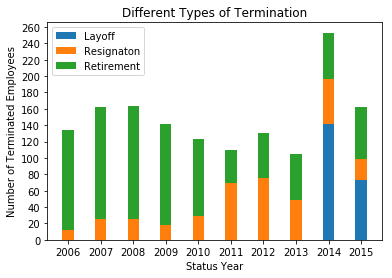

In [122]:

ind = np.arange(10)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

bars1 = pivot_table['STATUS']['Layoff'].tolist()
bars2 = pivot_table['STATUS']['Resignaton'].tolist()
bars3 = pivot_table['STATUS']['Retirement'].tolist()

p1 = plt.bar(ind, bars1, width)
p2 = plt.bar(ind, bars2, width, bottom=bars1)
p3 = plt.bar(ind, bars3, width, bottom=[i+j for i,j in zip(bars1, bars2)]) # ???????????????????????????

plt.xlabel('Status Year')
plt.ylabel('Number of Terminated Employees')
plt.title('Different Types of Termination')
plt.xticks(ind, ('2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014','2015'))
plt.yticks(np.arange(0, 270, 20))
plt.legend((p1[0], p2[0],p3[0]), ('Layoff', 'Resignaton','Retirement'))

plt.show()

From the above stacked bar, we can see that the number of layoff employees increase dramaticsly in 2014 and 2015, which implies that the company may not do well in 2014 and 2015. This trend can be predicted from 2011 - 2013 data: the number of resignation employees increased dramaticsly. Employees in that company know that the company will not perform well in the next several year so they leave earlier.

### Age affect termination

In [58]:
# Use pandas boxplot

([<matplotlib.axis.XTick at 0x18ee930f898>,
 <a list of 2 Text xticklabel objects>)

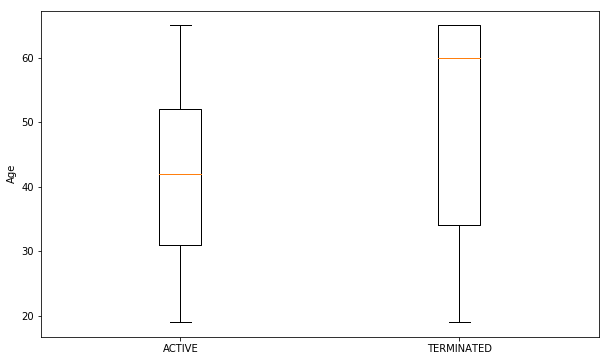

In [133]:
plt.figure(figsize=(10, 6))
pw_0 = data[data['STATUS']=='ACTIVE']['age']
pw_1 = data[data['STATUS']=='TERMINATED']['age']
plt.boxplot([pw_0, pw_1])
plt.ylabel('Age')
plt.xticks([1,2], ('ACTIVE','TERMINATED'))

Terninated employees have higher average age.